# Simple MNIST NN from scratch (no tf/keras, numpy)

implementation of a simple two layer neural network and training it on the MNIST digit-recognizer data set. It's meant to be an instructional example, through wich you can understand the underlying math of neural neyworks better.

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('train.csv')
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
data = np.array(data) #conversion a un array de numpy
m,n = data.shape
np.random.shuffle(data) # mezcla de los datos antes de dividir

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_, m_train = X_train.shape


In [10]:
Y_train 

array([7, 9, 2, ..., 2, 8, 3], shape=(41000,))

Our NN will have a simple two-layer architecture. Input layer $A^{[0]}$ will have  784 units corresponding to the 784 pixels in each 28x28 input image. A hidden layer $A^{[1]}$ will have 10 units with ReLU activation function, and finally our output layer $A^{[2]}$ with 10 units corresponding to the digit classes with softmax activation. 

**Forward Propagation**
$$ Z^{[1]} = W^{[1]}\cdot X + b^{[1]} $$
$$ A^{[1]} = g_{ReLU}(Z^{1}) $$

$$ Z^{[2]} = W^{[2]}\cdot A^{[1]} + b^{[2]} $$
$$ A^{[2]} = g_{\text{Softmax}}(Z^{2}) $$


**Backward Propagation**
$$ dZ^{[2]} = A^{[2]} - Y $$
$$ dW^{[2]} = \frac{1}{m} dZ^{[2]}A^{[1]T} $$

$$ dB^{[2]} = \frac{1}{m} \Sigma dZ^{[2]} $$
$$ dZ^{[1]} = W^{[2]T}dZ^{[2]} \cdot (g^{[1]} (Z^{[1]}))' $$

$$ dW^{[1]} = \frac{1}{m} dZ^{[1]}A^{[0]T} $$
$$ dB^{[1]} = \frac{1}{m} \Sigma dZ^{[1]} $$

**Parameter Updates**

$$ W^{[2]} = W^{[2]} - \alpha dW^{[2]} $$
$$ b^{[2]} = b^{[2]} - \alpha db^{[2]} $$

$$ W^{[1]} = W^{[1]} - \alpha dW^{[1]} $$
$$ b^{[1]} = b^{[1]} - \alpha db^{[1]} $$


**Variables and shapes**

forward prop
* $A^{[0]} = X$ : 784xm
* $Z^{[1]} \approx A^{[1]}$ : 10xn
* $W^{[1]}$ : 10x784 
* $B^{[1]}$ : 10x1
* $Z^{[2]} \approx A^{[2]}$ : 10xn
* $W^{[2]}$ : 10x10 
* $B^{[2]}$ : 10x1

Backprop

* $dZ^{[2]}$ : 10xm
* $dW^{[2]}$ : 10x10
* $dB^{[2]}$ : 10x1

* $dZ^{[1]}$ : 10xm
* $dW^{[1]}$ : 10x10
* $dB^{[1]}$ : 10x1

In [21]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A

def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def ReLU_deriv(Z):
    return Z > 0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max()+1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = (1/m) * dZ2.dot(A1.T)
    db2 = (1/m) * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = (1/m) * dZ1.dot(X.T)
    db1 = (1/m) * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 -= alpha*dW1
    b1 -= alpha*db1
    W2 -= alpha*dW2
    b1 -= alpha*db2
    return W1, b1, W2, b2



In [60]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    #print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def plot_accuracy_progress(accuracies, iterations_recorded):
    """
    Grafica el progreso del accuracy a lo largo de las iteraciones
    
    Parameters:
    - accuracies: lista de valores de accuracy
    - iterations_recorded: lista de números de iteración
    """
    plt.figure(figsize=(12, 6))
    plt.plot(iterations_recorded, accuracies, marker='o', linewidth=2, markersize=6, color='#2E86AB')
    plt.xlabel('Iteración', fontsize=12)
    plt.ylabel('Accuracy', fontsize=12)
    plt.title('Accuracy Progress on training data', fontsize=14, fontweight='bold')
    plt.grid(True, alpha=0.3)
    plt.ylim([0, 1.05])
    
    # Agregar anotación del valor final
    final_acc = accuracies[-1]
    final_iter = iterations_recorded[-1]
    plt.annotate(f'Final: {final_acc:.4f}', 
                xy=(final_iter, final_acc), 
                xytext=(-40, -30), 
                textcoords='offset points',
                bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.7),
                arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0'))
    
    plt.tight_layout()
    plt.show()

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    accuracies = []
    iterations_recorded = []
    
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)

        if i % 5 == 0:
            predictions = get_predictions(A2)
            acc = get_accuracy(predictions, Y)
            accuracies.append(acc)
            iterations_recorded.append(i)
            #print(f'Iteración {i}, Accuracy: {acc:.4f}')
    
    return W1, b1, W2, b2, accuracies, iterations_recorded


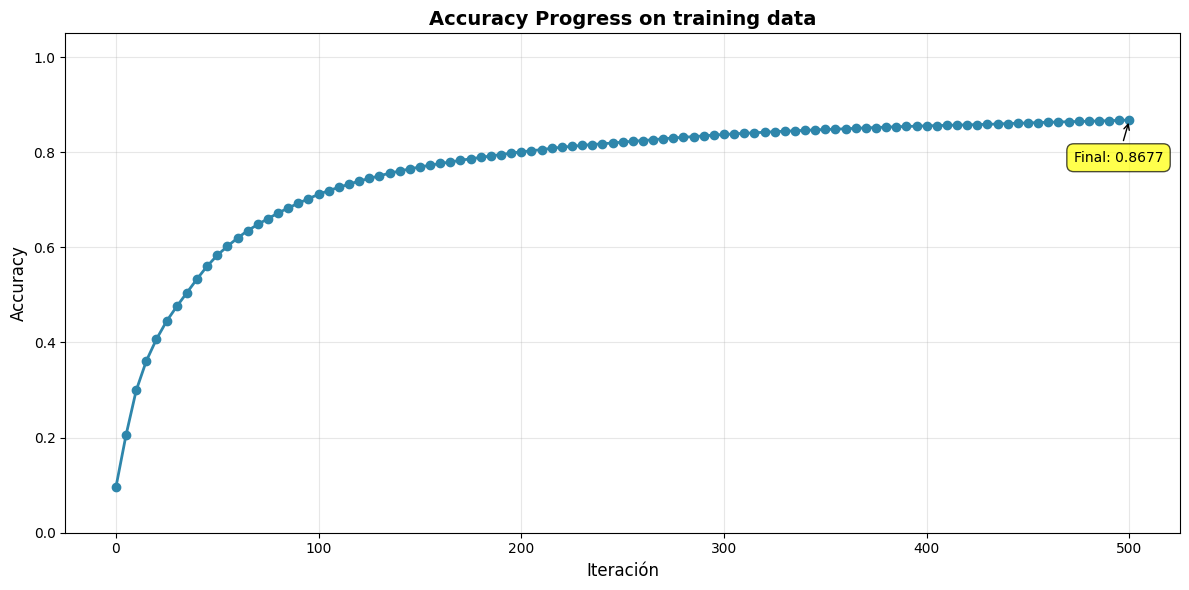

In [61]:
W1, b1, W2, b2, accuracies, iterations_recorded = gradient_descent(X_train, Y_train, 0.15, 501)

# Visualizar el progreso del accuracy
plot_accuracy_progress(accuracies, iterations_recorded)
